# Homework 2 Programming Problem 8 (30 points)

## Problem Description

In this problem you will use linear least squares to fit a linear function to a 3D temperature field, with x,y,z locations and an associated temperature T.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Predicted temperature `T(5,5,5)` using a hand-coded LLS squares model with a linear function
- Direction of travel from `(5,5,5)` to experience the greatest decrease in temperature

Discussion:
- Reasoning for how we can use our fitted function to determine the direction of greatest decrease in temperature

#### Imports and Utility Functions:

In [84]:
import numpy as np
from matplotlib import pyplot as plt

## Load the data

The data is contained in `tempfield.npy` and can be loaded with `np.load(tempfield.npy)`. The first three columns correspond to the `x`, `y`, and `z` locations of the data points, and the 4th column corresponds to the temperature `T` at the respective point. Store the data as you see fit.

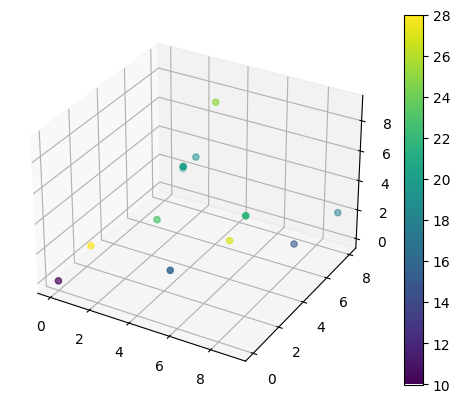

In [85]:
data = np.load("tempfield.npy")
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
z = data[:,2].reshape(-1,1)
T = data[:,3].reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
sc = ax.scatter(x, y, z, c=T)
plt.colorbar(sc)
plt.show()

## LLS Regression in 3D

Now fit a linear function to the data using the closed for of LLS regression. Use your fitted function to report the predicted temperature at `x = 5, y = 5, z = 5`. You are free to add regularization to your model, but this is not required and will not be graded.

In [86]:
I_m = np.eye(4)
I_m[-1,-1] = 0
def grad(X, w):
    gradient = 2*X.T @ (X @ w - T.reshape(-1,1))
    return gradient

X = np.concatenate([x, y, z, np.ones_like(x)], axis=1)
w = np.ones_like(X[1,:]).reshape(-1,1)
w_old = w
eta = 0.00025
L = np.power(np.e, -10)
n = 100000
for i in range(n):
    w = w - eta*grad(X, w)
    e = w - w_old
    if (e.T @ e < 1e-18):
        break
    w_old = w

X_test = np.array([5, 5, 5, 1])
T_test = X_test @ w
print(w)
print("Predicted temperature at x = 5, y = 5, z = 5 is: %f deg" % T_test[0])

[[-0.13421263]
 [ 0.11741869]
 [ 0.72677381]
 [17.83917408]]
Predicted temperature at x = 5, y = 5, z = 5 is: 21.389073 deg


## Gradient Intuition

Using the function you fit in the previous part, in which direction should one move from the point `p = (5,5,5)` to experience the largest decrease in temperature in the immediate neighborhood of the point? Report the specific direction, along with your reasoning.

One should move in the negative z direction to experience the largest temperature decrease because that has the largest magnitude w coeficient in the fitted function apart from the bias term. This means it will have the largest effect on temperature if changed.